In [14]:
import polars as pl 
import plotly.express as px 
from rdkit import Chem 
from rdkit.Chem import Draw

In [8]:
df = pl.read_csv("data/PubChem_compound_list_P3iYeoM65obRrOS1Zs2tnYhzhxMZzP35h9zmtZzN9LSc1Mg.csv")

len(df), df.columns[:6]

(36249, [' cid', 'cmpdname', 'cmpdsynonym', 'mw', 'mf', 'polararea'])

In [13]:
px.histogram(df, x="mw")

In [10]:
df.sort(by="mw")[:10, :4]

cid,cmpdname,cmpdsynonym,mw
i64,str,str,f64
5460634,"""Deuteron""","""Deuteron|deute…",2.014
28486,"""Lithium Cation…","""lithium ion|li…",7.0
107649,"""Beryllium(2+)""","""beryllium(2+)|…",9.012
297,"""Methane""","""02329_FLUKA|0C…",16.043
961,"""Hydroxide""","""hydroxide|hydr…",17.007
222,"""Ammonia""","""ammonia|azane|…",17.031
962,"""Water""","""water|7732-18-…",18.015
223,"""Ammonium""","""ammonium|Ammon…",18.039
28179,"""Fluoride Ion""","""fluoride|fluor…",18.998


In [11]:
df.sort(by="mw")[:-10, :4]

cid,cmpdname,cmpdsynonym,mw
i64,str,str,f64
5460634,"""Deuteron""","""Deuteron|deute…",2.014
28486,"""Lithium Cation…","""lithium ion|li…",7.0
107649,"""Beryllium(2+)""","""beryllium(2+)|…",9.012
297,"""Methane""","""02329_FLUKA|0C…",16.043
961,"""Hydroxide""","""hydroxide|hydr…",17.007
…,…,…,…
131704423,"""[oxidanyl-[oxi…","""[oxidanyl-[oxi…",1937.5
165368571,"""[(2R,3S,4R,5R,…","""[(2R,3S,4R,5R,…",1996.2
164575898,"""(2R,4R,5R,6R)-…","""NULL""",2010.5


In [12]:
data = df.filter(
    pl.col("mw") < 650, 
    pl.col("mw") > 30, 
).sort(by="mw")["canonicalsmiles"]

with open("pdb-1.txt", "w") as fn:
    fn.write("\n".join(list(data)))

In [13]:
data.sample(3).to_list()

['CC1=CN=C(N1CC2=CC=CC=C2OCCCC(C)CC(=O)O)C3=CC=C(C=C3)C(F)(F)F',
 'CC1=CC2=C(C=C1)N(C=C2C3CN=C(N3)C)S(=O)(=O)C4=CC=CC=C4Cl',
 'CCNC(=O)C1=CC(=C(C=C1)C)[N+](=O)[O-]']

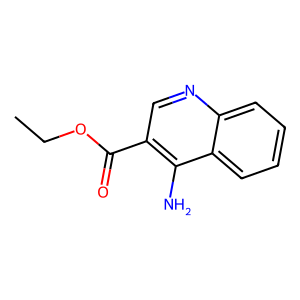

In [16]:
def draw_molecule(smiles):
    m = Chem.MolFromSmiles(smiles)
    fig = Draw.MolToImage(m)
    display(fig)

draw_molecule('CCOC(=O)C1=C(C2=CC=CC=C2N=C1)N')

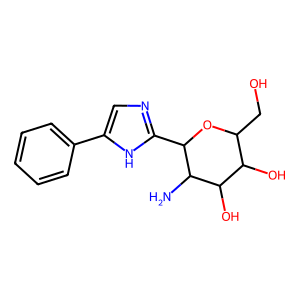

In [17]:
draw_molecule('C1=CC=C(C=C1)C2=CN=C(N2)C3C(C(C(C(O3)CO)O)O)N')

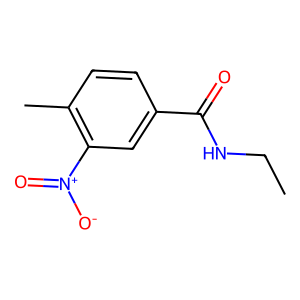

In [22]:
draw_molecule('CCNC(=O)C1=CC(=C(C=C1)C)[N+](=O)[O-]')

In [18]:
m = Chem.MolFromSmiles(df[0, "canonicalsmiles"])

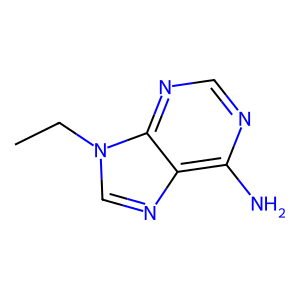

In [19]:
Draw.MolToImage(m)

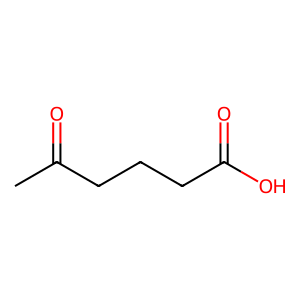

In [20]:
Draw.MolToImage(Chem.MolFromSmiles("CC(=O)CCCC(=O)O"))

In [21]:
# now we need some kind of sensible train/val/test split

# let's cluster the molecular fingerprints with rdkit 

In [22]:
pdb3_mols = """
CC12CCCC3C4C(C2(CO3)OCC4C5)OC1=O
CC1C(=O)NC2=NC(=NNC2=O)N(C3=NC(=NC(=C3)NC)N(C)CC#C)NC(=O)C4=C4C(CNC(CC4=O)N)N
CN(C)C1=NC=C(C2=C1NC(=N2)C3CC3)C4=CN=C(N=C4N)C5=CN=CC=C5C6=NCC=CN6
CC1=S(C2C(C(O1)C(C(C(O2)COP(=O)([O-])OP(=O)(O)O)O)O)O)F
CN1C=C(N=C1)C2=CC=CO2
COC1=C(C=C2C3=C(C(=C2)N=CN=C3)C4=CC(=NN4)C5=CN(N=C5)CCO)OC
C=CC(CSCC(C(C(=O)O)N)NC(=O)NCC(=O)O)N
C1=CC2=CNC(=O)NC2=C1
CC(C(=O)CCOP(=O)([O-])O)N
CCCN(C)CCCCCN
FOP(=O)(NC1C(C(C(C(O1O)OP(=O)(O)O)O)O)O)O
CCC(=O)NC1CCC(C2=CC(=O)C=C12)NC(=O)CNC(=O)C3=CC=CO3
COC1=CC(=CC(=C1OC)C#N)C2=CC(=CC(=C2)NOCCCCC3=CC=C(C=C3)Cl)(C)Cl
CCCC1=NC2=CN=C(N=C2N1C(C)C(=O)NCC3=CC=CC=C3)OCCN4CCCCC4
CC1(C(=O)NC2=CC4=C(S1)C3=C(N2)C(=CC=C4C#N)C5=NC=CC=C5)C(=O)N
C1CCC(C1)NC(=O)N(CC2CCCN2)C3C(C(C(O3)N4C=NC5=C(SC=C54)F)O)O
COC(=O)N(CC1=CC=C(C=C1)N(CC2=CC(=CC=C2)Cl)C=NO)CC3=CN=C(N=C3)N
CC(C)OC(=O)C1=CC=C(C=C1)C2=CC=CC(=C2)C3=CC=C(C=C3)C4=CC=NN4
C1C(=O)C=CN1C2=CC=C(C=C2)C3=C(N(C=C3)C4=NC=NN4CC5=CC(=CC=C5)CCO)N
C1CNC2=C(C=C(C=C2)Cl)C(=NC3=C(SC4=C3C=C(C=C4)Cl)C(=O)O)OC
CCOCCOC1=CC=C(C=C1)S(=O)(=O)NN
C1CCC2=C(C1)C=C(C=C2)CCC3=C4C=NNC(=N3)CNCCN4
CN1CCN(CC1)C2=CC=C(C=C2)N(C3=NC=C4C3=NC(=C4OCCS(=O)(=O)N)C5=CC6CCCC6=CC=CC=C6)C(=O)O
CC1(COC(C(N1)CC(=O)O)C(=O)O)C(CCC2=CC=CC=C2)C(=O)NC
COC1=CC=CC(=C1)CN2C=CC3=C2N(C(=C3)C(=N)N)C4=CC(=C(C=C4)O)C5=CC=CC(=C5)C6=CC=CC=C65
CC1=C(C=C(C(=O)C(=C1)F)F)CC2C(C(C(O2)CCCNC(=O)C)O)O
CCCCCCCCN(C)C1=CC=C(C=C1)Br
CC(=O)NC1=CC(=NO1)C2=NC=CC=C2
C1=COC(=C1)C2=NC3=C(N2)C=C(C=C3)C(=O)O
CN1C=C(C=N1)C(=O)N(C)C
C1=CC(=CN=C1)C2=NC=C3C4=C(C(=C2)C4=CC=C(C=C4)Cl)C=CC#N
CC(C)S(=O)(=O)N1CCCC(C1)(CO)C2=C(C(=C(C=C2F)Cl)Cl)S(=O)=O
C[N+]1(CC(OCC1=O)(O)C)CSCCCN(C)C
CC1C(C(C(C(O1)OP(=O)(O)OP(=O)(O)OCC2C(CC(O2)N3C=CC4=C(C=C3)OC(OP(=O4)(O)O)O)O)O)O)O
CC(=O)OC(CC1=CC=CC=C1O)S(=O)(=O)N
CSC1=C2N=C(C(=C1C(F)F)C(=C)NC(=O)NC3=CC(=C(C=C3)F)O)C=CC=C2
CC1CN(CC(C1NC2=NC(=NC3=C2N=CN=C3N)C4=CC=C(C=C4)C(=O)NC)C(F)(F)F)C
C1CCC2=C(C1)C3=C(N2CC(=O)N(CC3=N)CCC4=CC=CC=C4)S(=O)(=O)CC5=CC=C(C=C5)Cl
CN1C=NC=C1
C1=CC=C(C(=C1)CC(C(=O)O)(O)O)N
C1=NC(=C2C(=N1)N(C=N2)C3C(C(C(O3)CSCCCN)O)O)CC(CC(=O)O)N
CC1=C(SC(=N1)NC2=CC=C(C=C2)S(=O)(=O)C)C3=CN=CC4=C3NC(=O)C=C4
C1=CC(=C2C=CC3=C(C2=C1)C=C(C=C3)S(=O)(=O)O)CN
CC(C(C(=O)O)NC(C(=O)N1CCCC1C#N)O)N2C3=C(C=CC(=C3)Cl)Cl
CC(=O)NC(CCCN=C(N)N)SC1=CC=C(C=C1)S(=O)(=O)N
C1CCC(CC1)(C2=CC=CC=C2)C(=O)O
COC1=CC(=CC(=C1OC)OC)NC(C2C(C(C(C(O2)CO)O)OC(=O)CO)O)N
""".split()

pdb3_mols

['CC12CCCC3C4C(C2(CO3)OCC4C5)OC1=O',
 'CC1C(=O)NC2=NC(=NNC2=O)N(C3=NC(=NC(=C3)NC)N(C)CC#C)NC(=O)C4=C4C(CNC(CC4=O)N)N',
 'CN(C)C1=NC=C(C2=C1NC(=N2)C3CC3)C4=CN=C(N=C4N)C5=CN=CC=C5C6=NCC=CN6',
 'CC1=S(C2C(C(O1)C(C(C(O2)COP(=O)([O-])OP(=O)(O)O)O)O)O)F',
 'CN1C=C(N=C1)C2=CC=CO2',
 'COC1=C(C=C2C3=C(C(=C2)N=CN=C3)C4=CC(=NN4)C5=CN(N=C5)CCO)OC',
 'C=CC(CSCC(C(C(=O)O)N)NC(=O)NCC(=O)O)N',
 'C1=CC2=CNC(=O)NC2=C1',
 'CC(C(=O)CCOP(=O)([O-])O)N',
 'CCCN(C)CCCCCN',
 'FOP(=O)(NC1C(C(C(C(O1O)OP(=O)(O)O)O)O)O)O',
 'CCC(=O)NC1CCC(C2=CC(=O)C=C12)NC(=O)CNC(=O)C3=CC=CO3',
 'COC1=CC(=CC(=C1OC)C#N)C2=CC(=CC(=C2)NOCCCCC3=CC=C(C=C3)Cl)(C)Cl',
 'CCCC1=NC2=CN=C(N=C2N1C(C)C(=O)NCC3=CC=CC=C3)OCCN4CCCCC4',
 'CC1(C(=O)NC2=CC4=C(S1)C3=C(N2)C(=CC=C4C#N)C5=NC=CC=C5)C(=O)N',
 'C1CCC(C1)NC(=O)N(CC2CCCN2)C3C(C(C(O3)N4C=NC5=C(SC=C54)F)O)O',
 'COC(=O)N(CC1=CC=C(C=C1)N(CC2=CC(=CC=C2)Cl)C=NO)CC3=CN=C(N=C3)N',
 'CC(C)OC(=O)C1=CC=C(C=C1)C2=CC=CC(=C2)C3=CC=C(C=C3)C4=CC=NN4',
 'C1C(=O)C=CN1C2=CC=C(C=C2)C3=C(N(C=C3)C4=NC=NN4CC5=CC(=

In [23]:
pdb1_mols = """
CC12CCCC(C1CCC34C2CCC(C4)(C3=C)COS(=O)(=O)N)(N)O
CC1CC(C2=C(N1C(=O)C3=CC=CC=C3N2C)C(=O)NCC4=CC=CC=C4)C(=O)N
C1=CC=C2C(=C1)C=CC=C2CN
CC1=C(C=C(C=C1)C(=O)NC2=CC(=C(C=C2)C(=O)N)SC3=C4C=C(C=CC(=N4)N)F)NC3=O
CN1C=C(N=N1)C2=CC=CO2
COC1=CC(=CC(=C1OC)OC)C(=O)CC=CC2=CC(=NN2C3=CC=C(C=C3)CO)OC
C=C1CCNC(=O)C1
C1=CC2=C(C(=C1)S(=O)(=O)NCCOC3=CC=CC(=C3)Cl)C(=O)N2
CC1=C(C(CC(C1=O)O)C(=O)O)O
CCCN(CC1=CC=CO1)C
COC(CC(C(=O)O)O)OC(=O)C1C(C(C(C(O1)O)O)O)O
CCC(=O)NC1CCC(C2=CC=CC=C21)N
C1=CC=C(C=C1)CN2C(=CC=C2)CC(=O)C3=CC(=C(C=C3)O)O
CCCC1=NC2=CN=C(N=C2N1C3C(C(C(O3)CO)O)O)N
CC1(C(=O)N(C2=CC=CC=C21CCC(=O)NC)C)C
C1CCC(C1)N2C=NC3=CC=CC=C3N=N2
C1C(C2=C(CN1C2)C(=O)O)CN
CC(C(C(=O)NCCCN=C(N)N)NC(=O)C1=CC=C(C=C1)Cl)OC
C1C(=O)C=CN1C2=CC=C(C=C2)C3=C(C(=CC=C3)Cl)O
C1CNC2=C(C1C=CC(=N2)NC(=O)C3=CSC4=C3C=C(C=NC4N)C5=CC=CC=C5)C(=O)N
C1CNCCN1C(=O)N2CCOC2
C1CCC2=C(C1)C=CC(=C2)CC3=C(NC4=NN=C(N=C43)N)CCC#N
CN1CCN(CC1)C2=CC=C(C=C2)N(CC3=[N+](=CC=C3)C4=CSC=N4)CC5=C(C=CC(=C5)O)Cl
CC1(COC1)NS(=O)(=O)C2C(C(C(O2)COP(=O)(O)O)O)O
COC1=CC=CC(=C1)CN2C=CC(=N2)C(=O)NCCC3=C(C(=C(C(=C3)OC)O)OC)OC
CC1=C(C=C(C=C1)C(=O)N)C2=CC=C(C=C2)S(=O)(=O)NCCCCCOC
C1CCC(CC1)C2=NNC(=O)N2
C1=COC(=C1)COC2=CC(=CC(=C2)C=O)O
CN1C=C(C=N1)C2=CC=C(C=C2)CNS(=O)(=O)C3=CC=CC(=C3)C(=O)C4=CN=CC=C4
C1=CC(=CN=C1)C2=NC=C(C(=N2)CC3=CC=NC=C3)C4=CC=CC=C4
CC(CS)C(=O)NC1=CC2=C(C=C1)OCO2)C(=O
C[N+]1(CC(OC1)O)CC2=CN=CC=C2
CC1C(C(C(C(O1)OP(=O)(O)OP(=O)(O)OCC2C(CC(O2)N3C=CC(=O)NC3=O)C(=O)O)O)O)O
CC(=O)OC1C(C=C(O1)O)CO
CSC1=C2NC(=NC2=C1C3=CC=CO3)N
CC1CN(CC(C1NC(=O)C(C2=CN(N=N2)C(=O)N)CC)C(=O)NC(CO)C(C)C(=O)N)C(CC3=CC=CC=C3)O
C1CCC2=C(C1=NN(C3=CC=CC=C31)C4=CC=CC=N4)CCC(P2)SC5=NC=NC(=C5S(N6)CCNS(=O)(O)O)N
CN1C=NC=C1
C1=CC=C2C(=C1)C3=C(NN=C3C=C2)N
C1=NC(=C2C(=N1)N(C=N2)C3C(C(C(O3)CSCl)O)O)N
CC1=C(C=NC=C1)NC(=O)C(C)C2=CC=CC=C2
C1=CC(=C2C(=C1C(=O)C(=CC=C2)O)SC=CC3=C(C(=CC(=C3F)O)F)O)[N+](=O)[O-]
CC(C(C(=O)O)NC=O)C(=NN1)NC(=O)C(CC(C)C)NC(=O)C1=CC=CC=C1
CC(=O)NC(CCCN=C(N)N)C(=O)NCC1=CC(=C(C=C1)F)Cl
C1CCC2=C(C=C(C(=N2)C(=O)O)Cl)NC3=NC(=NC=C3)NCC4=CNC(=O)C(=N4)C5COCO4
COC1=CC(=CC(=C1OC)OC)C2=CSC=C2
""".split() 

pdb1_mols

['CC12CCCC(C1CCC34C2CCC(C4)(C3=C)COS(=O)(=O)N)(N)O',
 'CC1CC(C2=C(N1C(=O)C3=CC=CC=C3N2C)C(=O)NCC4=CC=CC=C4)C(=O)N',
 'C1=CC=C2C(=C1)C=CC=C2CN',
 'CC1=C(C=C(C=C1)C(=O)NC2=CC(=C(C=C2)C(=O)N)SC3=C4C=C(C=CC(=N4)N)F)NC3=O',
 'CN1C=C(N=N1)C2=CC=CO2',
 'COC1=CC(=CC(=C1OC)OC)C(=O)CC=CC2=CC(=NN2C3=CC=C(C=C3)CO)OC',
 'C=C1CCNC(=O)C1',
 'C1=CC2=C(C(=C1)S(=O)(=O)NCCOC3=CC=CC(=C3)Cl)C(=O)N2',
 'CC1=C(C(CC(C1=O)O)C(=O)O)O',
 'CCCN(CC1=CC=CO1)C',
 'COC(CC(C(=O)O)O)OC(=O)C1C(C(C(C(O1)O)O)O)O',
 'CCC(=O)NC1CCC(C2=CC=CC=C21)N',
 'C1=CC=C(C=C1)CN2C(=CC=C2)CC(=O)C3=CC(=C(C=C3)O)O',
 'CCCC1=NC2=CN=C(N=C2N1C3C(C(C(O3)CO)O)O)N',
 'CC1(C(=O)N(C2=CC=CC=C21CCC(=O)NC)C)C',
 'C1CCC(C1)N2C=NC3=CC=CC=C3N=N2',
 'C1C(C2=C(CN1C2)C(=O)O)CN',
 'CC(C(C(=O)NCCCN=C(N)N)NC(=O)C1=CC=C(C=C1)Cl)OC',
 'C1C(=O)C=CN1C2=CC=C(C=C2)C3=C(C(=CC=C3)Cl)O',
 'C1CNC2=C(C1C=CC(=N2)NC(=O)C3=CSC4=C3C=C(C=NC4N)C5=CC=CC=C5)C(=O)N',
 'C1CNCCN1C(=O)N2CCOC2',
 'C1CCC2=C(C1)C=CC(=C2)CC3=C(NC4=NN=C(N=C43)N)CCC#N',
 'CN1CCN(CC1)C2=CC=C(C=C2)N(CC3=[N

In [24]:
! mkdir img 

mkdir: img: File exists


In [25]:
count = 0 
for mol in pdb3_mols:
    try:
        fig = Draw.MolToImage(Chem.MolFromSmiles(mol))
        fig.save(format="png", fp=f"img/pdb3_{mol}.png") 
        count += 1 
    except:
        print("not a mol")

count, len(pdb3_mols)

not a mol
not a mol
not a mol
not a mol
not a mol


[00:10:01] SMILES Parse Error: unclosed ring for input: 'CC12CCCC3C4C(C2(CO3)OCC4C5)OC1=O'
[00:10:01] SMILES Parse Error: unclosed ring for input: 'CC1C(=O)NC2=NC(=NNC2=O)N(C3=NC(=NC(=C3)NC)N(C)CC#C)NC(=O)C4=C4C(CNC(CC4=O)N)N'
[00:10:01] SMILES Parse Error: unclosed ring for input: 'COC1=C(C=C2C3=C(C(=C2)N=CN=C3)C4=CC(=NN4)C5=CN(N=C5)CCO)OC'
[00:10:01] Explicit valence for atom # 10 O, 3, is greater than permitted
[00:10:01] Explicit valence for atom # 14 C, 5, is greater than permitted
[00:10:01] SMILES Parse Error: unclosed ring for input: 'CC1(C(=O)NC2=CC4=C(S1)C3=C(N2)C(=CC=C4C#N)C5=NC=CC=C5)C(=O)N'
[00:10:01] SMILES Parse Error: unclosed ring for input: 'C1CNC2=C(C=C(C=C2)Cl)C(=NC3=C(SC4=C3C=C(C=C4)Cl)C(=O)O)OC'
[00:10:01] SMILES Parse Error: unclosed ring for input: 'CN1CCN(CC1)C2=CC=C(C=C2)N(C3=NC=C4C3=NC(=C4OCCS(=O)(=O)N)C5=CC6CCCC6=CC=CC=C6)C(=O)O'
[00:10:01] SMILES Parse Error: unclosed ring for input: 'COC1=CC=CC(=C1)CN2C=CC3=C2N(C(=C3)C(=N)N)C4=CC(=C(C=C4)O)C5=CC=CC(=C5)C6=

not a mol
not a mol
not a mol
not a mol
not a mol
not a mol
not a mol


[00:10:01] SMILES Parse Error: unclosed ring for input: 'C1=CC(=CN=C1)C2=NC=C3C4=C(C(=C2)C4=CC=C(C=C4)Cl)C=CC#N'
[00:10:01] Explicit valence for atom # 33 O, 3, is greater than permitted
[00:10:01] SMILES Parse Error: unclosed ring for input: 'CC(C(C(=O)O)NC(C(=O)N1CCCC1C#N)O)N2C3=C(C=CC(=C3)Cl)Cl'


(35, 47)

In [26]:
fig.save

<bound method Image.save of <PIL.PngImagePlugin.PngImageFile image mode=RGB size=300x300 at 0x31B071190>>